<IPython.core.display.Javascript object>


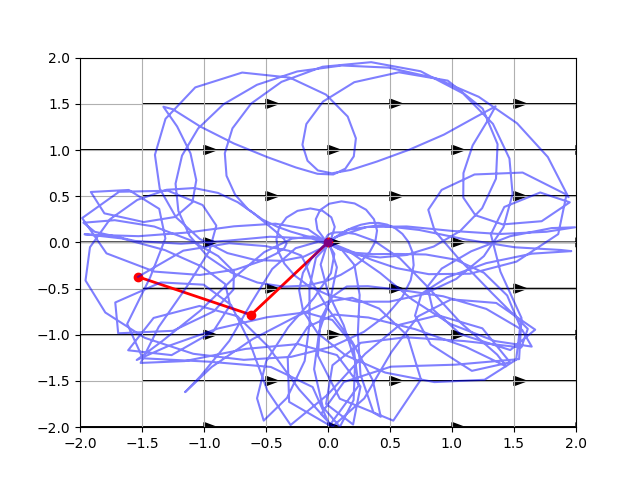

In [5]:
from tkinter import *
root=Tk()
inputValues = []
def retrieve_input():
    omega1=textBox1.get("1.0","end-1c")
    omega2=textBox2.get("1.0","end-1c")
    theta1=textBox3.get("1.0","end-1c")
    theta2=textBox4.get("1.0","end-1c")
    potential = textBox5.get("1.0","end-1c")
    inputValues.append(omega1)
    inputValues.append(omega2)
    inputValues.append(theta1)
    inputValues.append(theta2)
    inputValues.append(potential)
var1 = StringVar()
labelom1 = Label(root, textvariable=var1, relief=RAISED )
var1.set("Initial Inner Omega")
labelom1.pack()
textBox1=Text(root, height=1, width=10)
textBox1.pack()
var2 = StringVar()
labelom2= Label(root, textvariable=var2, relief=RAISED )
var2.set("Initial Outer Omega")
labelom2.pack()
textBox2=Text(root, height=1, width=10)
textBox2.pack()
var3 = StringVar()
labelth1 = Label(root, textvariable=var3, relief=RAISED )
var3.set("Initial Inner Theta")
labelth1.pack()
textBox3=Text(root, height=1, width=10)
textBox3.pack()
var4 = StringVar()
labelth2 = Label(root, textvariable=var4, relief=RAISED )
var4.set("Initial Outer Theta")
labelth2.pack()
textBox4=Text(root, height=1, width=10)
textBox4.pack()
var5 = StringVar()
labelpot = Label(root, textvariable=var5, relief=RAISED )
var5.set("Initial Potential")
labelpot.pack()
textBox5=Text(root, height=1, width=10)
textBox5.pack()
buttonCommit=Button(root, height=1, width=10, text="Commit", command=lambda: retrieve_input())
#command=lambda: retrieve_input() >>> just means do this when i press the button
buttonCommit.pack()

mainloop()

%matplotlib notebook
from numpy import sin, cos
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
Q1 = 1.0  #charge of pendulum 1
Q2 = 1.0  #charge of pendulum 2
E_const = 1997.74 #N/C
U_const = float(inputValues[4]) #V

def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1] + U_const

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3] + U_const

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = float(inputValues[2])
w1 = float(inputValues[0])
th2 = float(inputValues[3])
w2 = float(inputValues[1])

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1


#nx, ny = 400, 400
#x = np.linspace(-2, 2, nx)
#y = np.linspace(-2, 2, ny)
#X, Y = np.meshgrid(x, y)
#u, v = np.meshgrid(1,1)
#plt.quiver(x, y, u, v, scale=100)


fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

for i in range (-2,2):
    for j in range (-2,2):
        ax.arrow(i+0.5, j+0.5, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
for i in range (-2,2):
    for j in range (-2,2):
        ax.arrow(i, j, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')



line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)




class doublep:
    def __init__(self,theta,phi):

        # create a time array from 0..100 sampled at 0.05 second steps
        self.dt = 0.05
        self.t = np.arange(0.0, 100, self.dt)

        # th1 and th2 are the initial angles (degrees)
        # w10 and w20 are the initial angular velocities (degrees per second)
        self.th1 = theta
        self.w1 = 0.0
        self.th2 = phi
        self.w2 = 0.0

        self.rad = pi/180

        # initial state
        self.state = np.array([self.th1, self.w1, self.th2, self.w2])*pi/180.

        # integrate your ODE using scipy.integrate.
        self.y = integrate.odeint(derivs, self.state, self.t)

        self.x1 = L1*sin(self.y[:,0])
        self.y1 = -L1*cos(self.y[:,0])

        self.x2 = L2*sin(self.y[:,2]) + self.x1
        self.y2 = -L2*cos(self.y[:,2]) + self.y1

        self.history = [[],[]]

        #self.color = colors.pop()

        self.line, = ax.plot([], [], 'o-', lw=2,color = 'red')
        self.hist, = ax.plot([],[],'-',alpha=.5, color = 'blue')
        self.time_template = 'time = %.1fs'
        self.time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    def start(self):
        self.line.set_data([], [])
        self.hist.set_data([], [])
        self.history = [[],[]]
        return self.line, self.time_text

    def animate(self,i):
        self.thisx = [0, self.x1[i], self.x2[i]]
        self.thisy = [0, self.y1[i], self.y2[i]]

        self.history[0].append(self.x2[i])
        self.history[1].append(self.y2[i])

        self.line.set_data(self.thisx, self.thisy)
        self.hist.set_data(self.history[0],self.history[1])
        return self.line, self.hist

ob = doublep(90,90.5)
#ob2 = doublep(90,90)
#ob3 = doublep(90,89.5)

def init():
    return ob.start(),\
    #ob2.start(),\
    #ob3.start()

def animate(i):
    return ob.animate(i),\
    #ob2.animate(i),\
    #ob3.animate(i)

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(ob.y)),
    interval=100, blit=False, init_func=init)


#ani.save('double_pendulum.mp4', fps=24,bitrate=-1,dpi=200)
plt.show()